## Regression -- Predicting house price

### Import modules and data

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split`aa

In [74]:
df = pd.read_csv('data/home_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [75]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


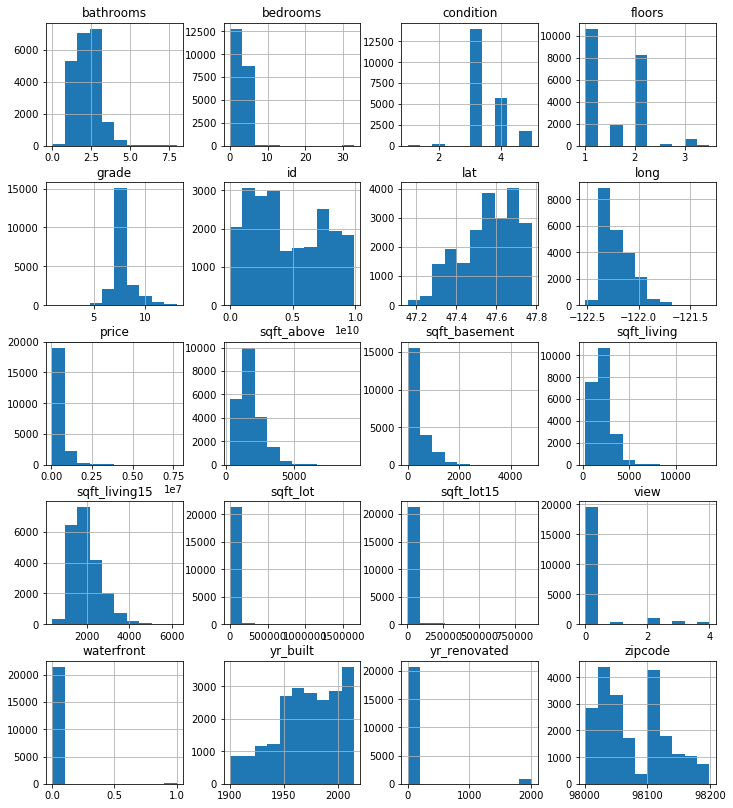

In [76]:
_ = df.hist(figsize=(12,14))

### Data analysis

#### Selection and summary statistics
Average price of each neighborhood (zipcode), from high to low.

In [81]:
df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

zipcode
98039    2.160607e+06
98004    1.355927e+06
98040    1.194230e+06
98112    1.095499e+06
98102    9.012582e+05
98109    8.796236e+05
98105    8.628252e+05
98006    8.596848e+05
98119    8.494480e+05
98005    8.101649e+05
98033    8.037195e+05
98199    7.918208e+05
98075    7.905767e+05
98074    6.856058e+05
98077    6.827749e+05
98053    6.781631e+05
98177    6.761854e+05
98008    6.455074e+05
98052    6.452315e+05
98122    6.343602e+05
98115    6.199006e+05
98116    6.186342e+05
98007    6.171051e+05
98027    6.169906e+05
98029    6.126536e+05
98144    5.945476e+05
98103    5.849192e+05
98024    5.805268e+05
98107    5.790534e+05
98117    5.767950e+05
             ...     
98014    4.556171e+05
98045    4.394711e+05
98019    4.247887e+05
98126    4.247064e+05
98155    4.237257e+05
98010    4.236660e+05
98056    4.208905e+05
98118    4.176374e+05
98133    3.869974e+05
98038    3.668676e+05
98146    3.594832e+05
98108    3.556785e+05
98058    3.536086e+05
98092    3.349211e+05
98

#### Filtering data

In [84]:
df[(df.sqft_living >= 2000) & (df.sqft_living <= 4000)].count()[0]

9221

### Building a regression model

In [72]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground1
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors
'sqft_lot15' # average lot size of 15 nearest neighbors 
]

In [93]:
regr = LinearRegression()
y = np.array(df['price'])

X1 = np.array(df[my_features])
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=0)
model1 = regr.fit(X_train1, y_train1)
rmse1 = np.sqrt(np.mean((model1.predict(X_test1) - y_test1)**2))

X2 = np.array(df[advanced_features])
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=0)
model2 = regr.fit(X_train2, y_train2)
rmse2 = np.sqrt(np.mean((model2.predict(X_test2) - y_test2)**2))

print("RMSE for the model with my_features: %f, \nRMSE for the model with advanced_features: %f, \nRMSE difference: %f"%(rmse1, rmse2, rmse1-rmse2))

RMSE for the model with my_features: 244004.774431, 
RMSE for the model with advanced_features: 190473.375710, 
RMSE difference: 53531.398721
